# Wine Dataset - KNN

## Imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

import sklearn

## Data

In [3]:
from sklearn.datasets import load_wine

In [4]:
wine = load_wine()

In [5]:
df = pd.DataFrame(data=np.c_[wine["data"], wine["target"]],columns = wine["feature_names"]+["target"])

In [6]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [7]:
df["target"].nunique()

3

In [8]:
print(df["target"].unique())

[0. 1. 2.]


In [9]:
def type(wine):
    if wine == 0:
        return("Class 1")
    elif wine == 1:
        return("Class 2")
    else:
        return("Class 3")
df["type"] = df["target"].apply(type)

In [10]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0,Class 1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0,Class 1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0,Class 1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0,Class 1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0,Class 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0,Class 3
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0,Class 3
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0,Class 3
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0,Class 3


## EDA

Text(0.5, 0, 'Wine Class')

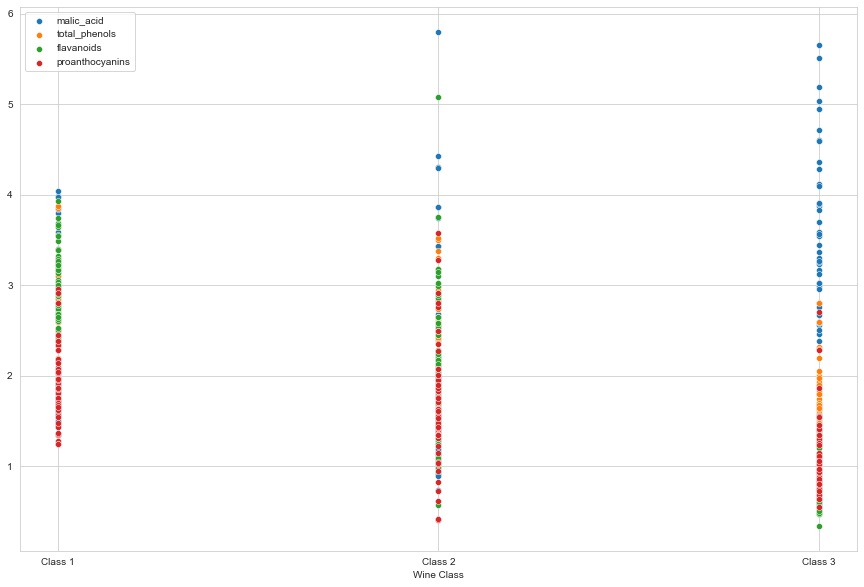

In [11]:
plt.figure(figsize=[15,10])
sns.scatterplot(data=df, x="type", y="malic_acid")
sns.scatterplot(data=df, x="type", y="total_phenols")
sns.scatterplot(data=df, x="type", y="flavanoids")
sns.scatterplot(data=df, x="type", y="proanthocyanins")
plt.legend(df[["malic_acid","total_phenols","flavanoids","proanthocyanins"]])
plt.ylabel("")
plt.xlabel("Wine Class")

Text(0, 0.5, '')

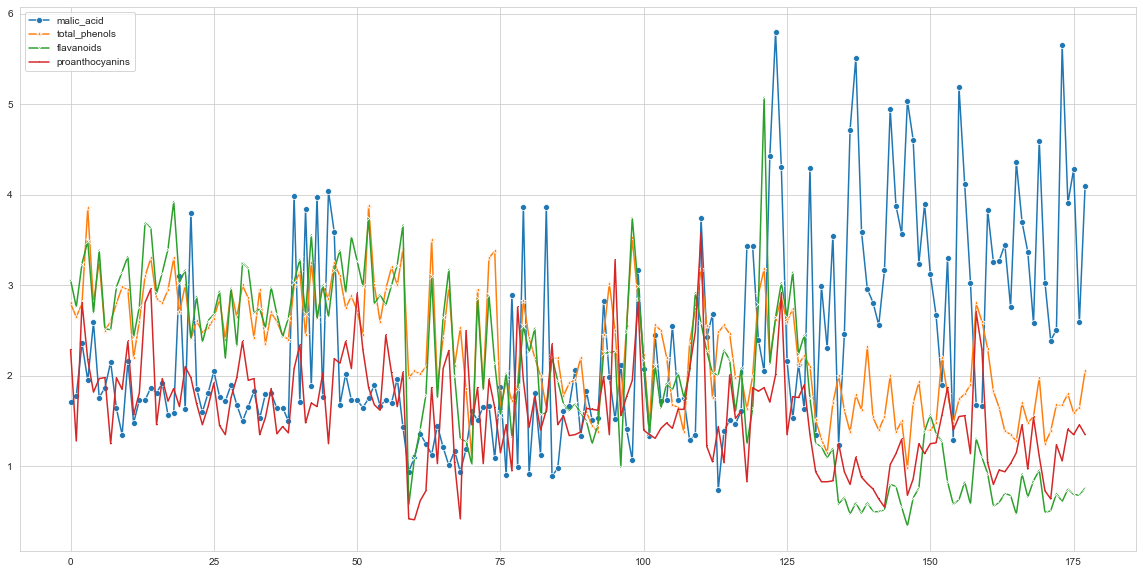

In [12]:
plt.figure(figsize=[20,10])
sns.lineplot(x=range(0,178), y=df["malic_acid"],marker="o")
sns.lineplot(x=range(0,178), y=df["total_phenols"],marker="*")
sns.lineplot(x=range(0,178), y=df["flavanoids"],marker="x")
sns.lineplot(x=range(0,178), y=df["proanthocyanins"],marker=",")
plt.legend(df[["malic_acid","total_phenols","flavanoids","proanthocyanins"]])
plt.ylabel("")

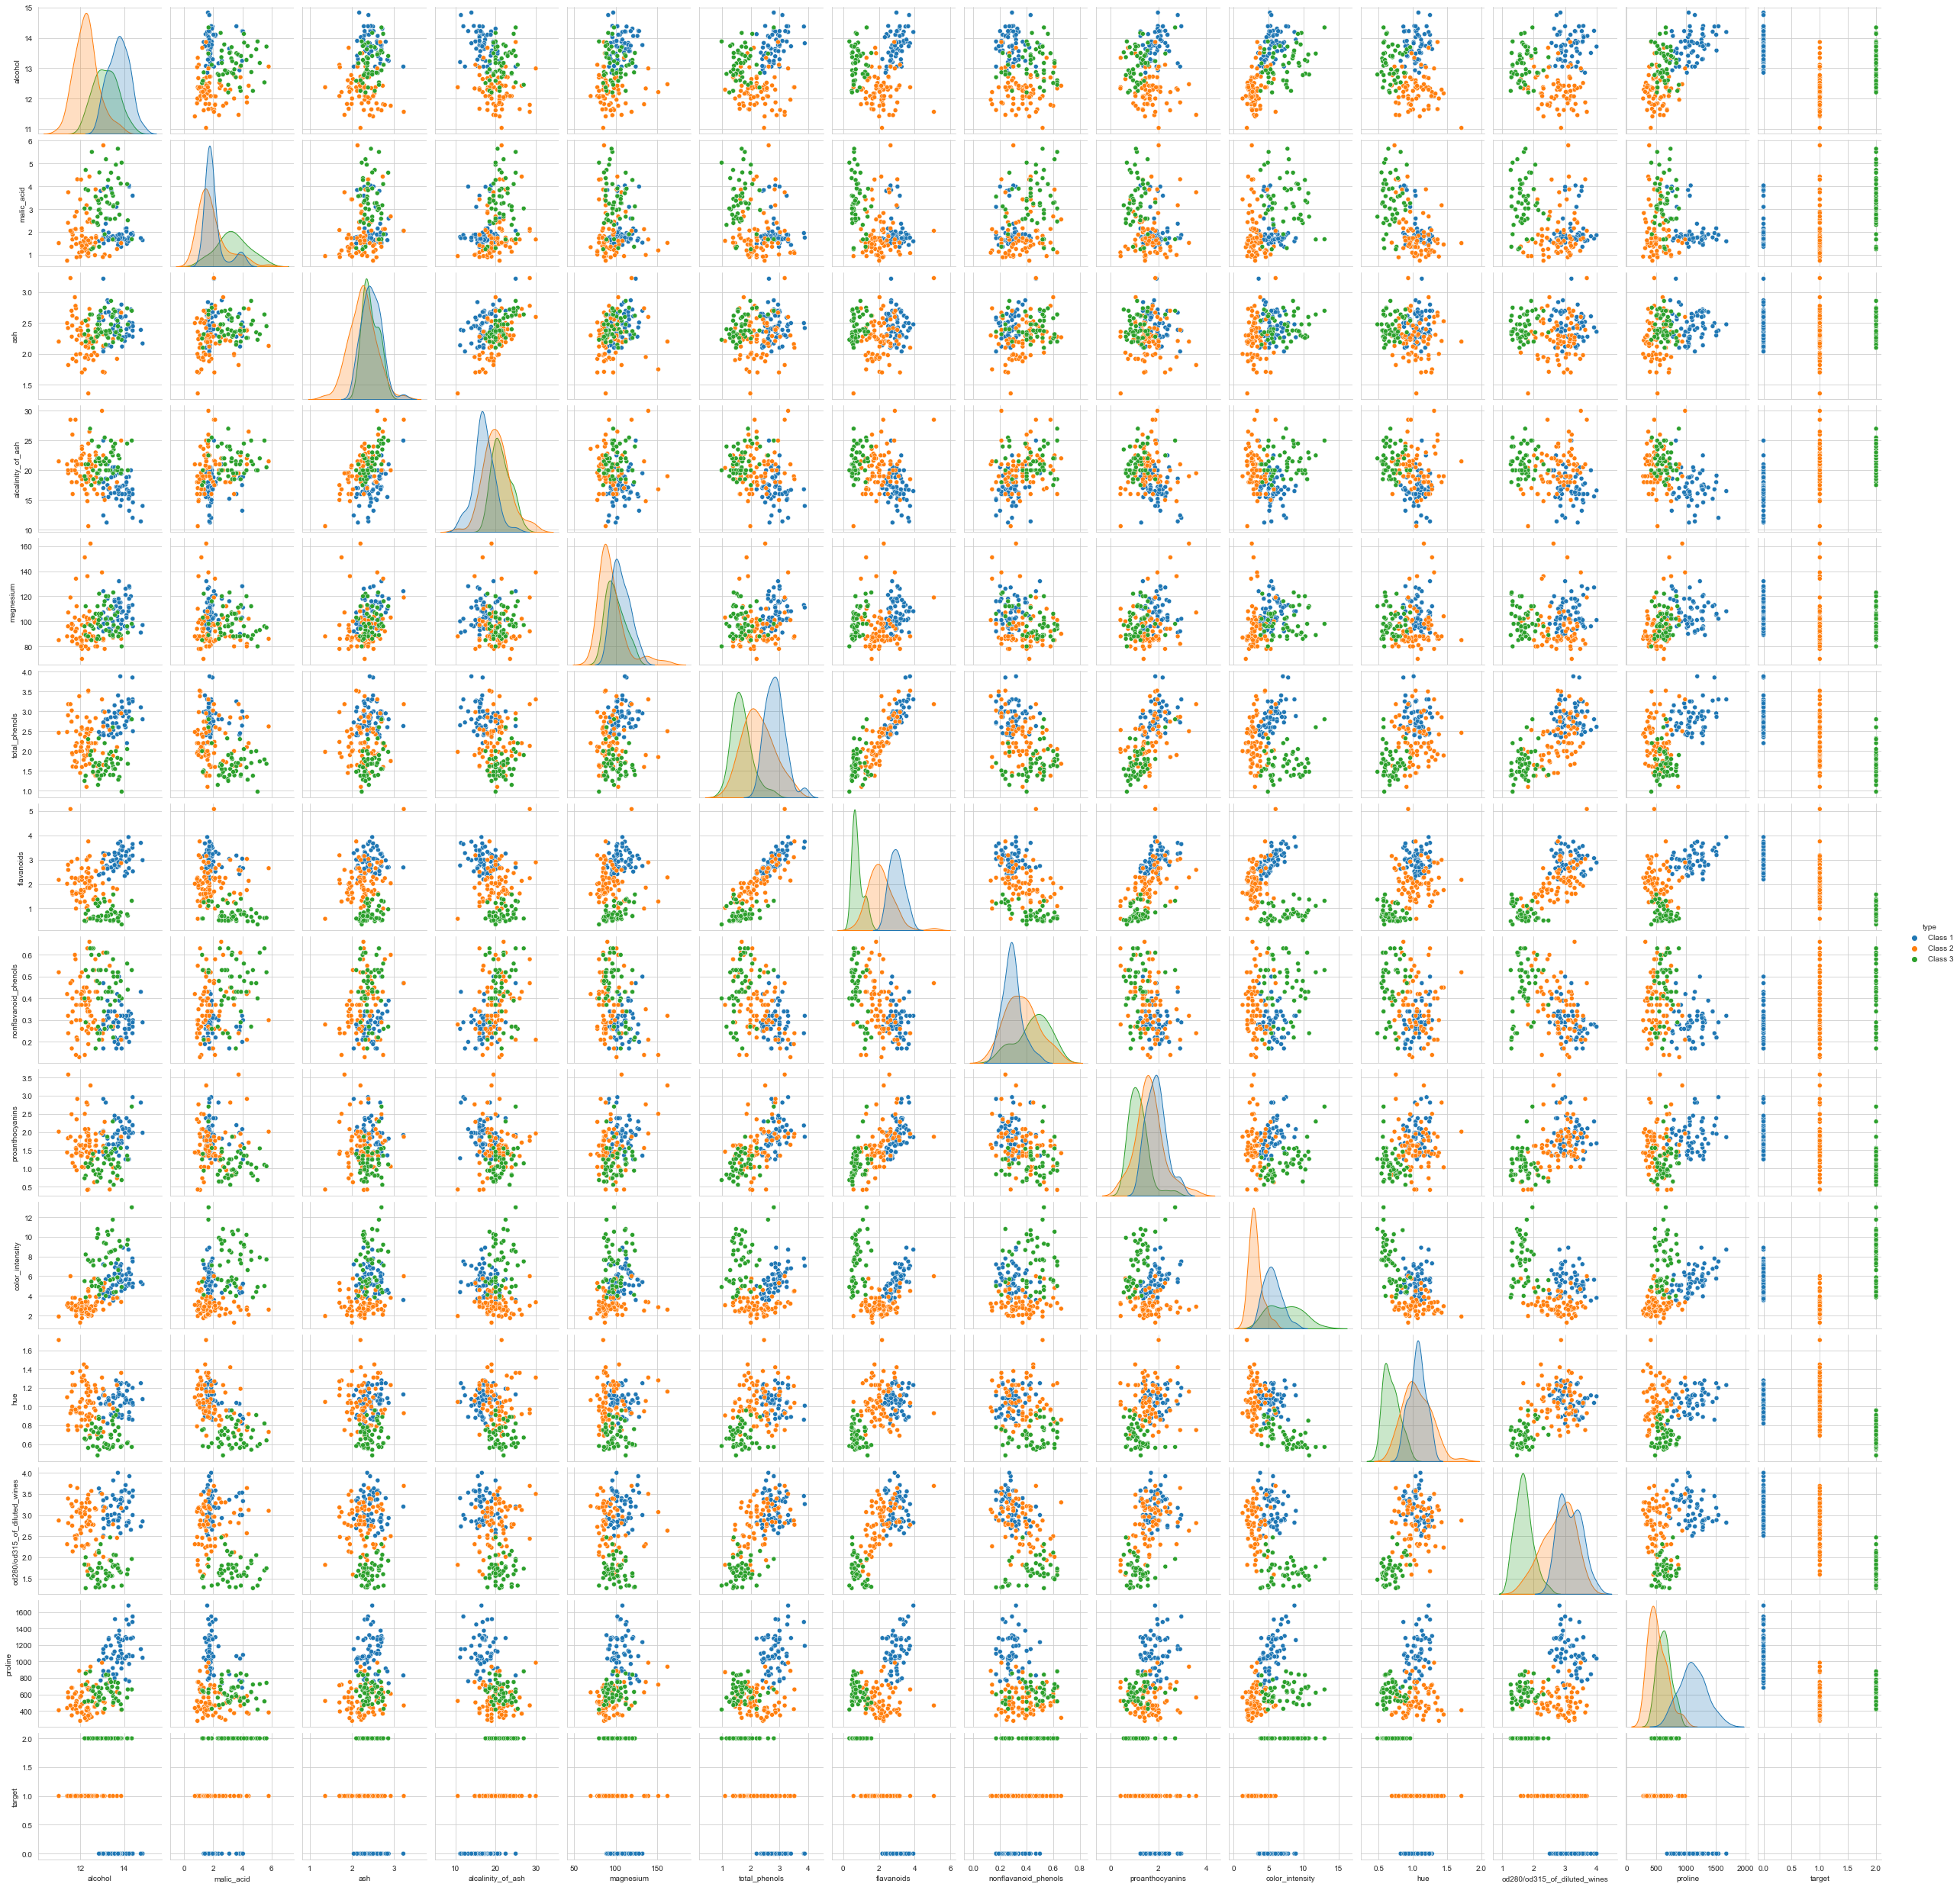

In [13]:
sns.pairplot(df,hue="type")

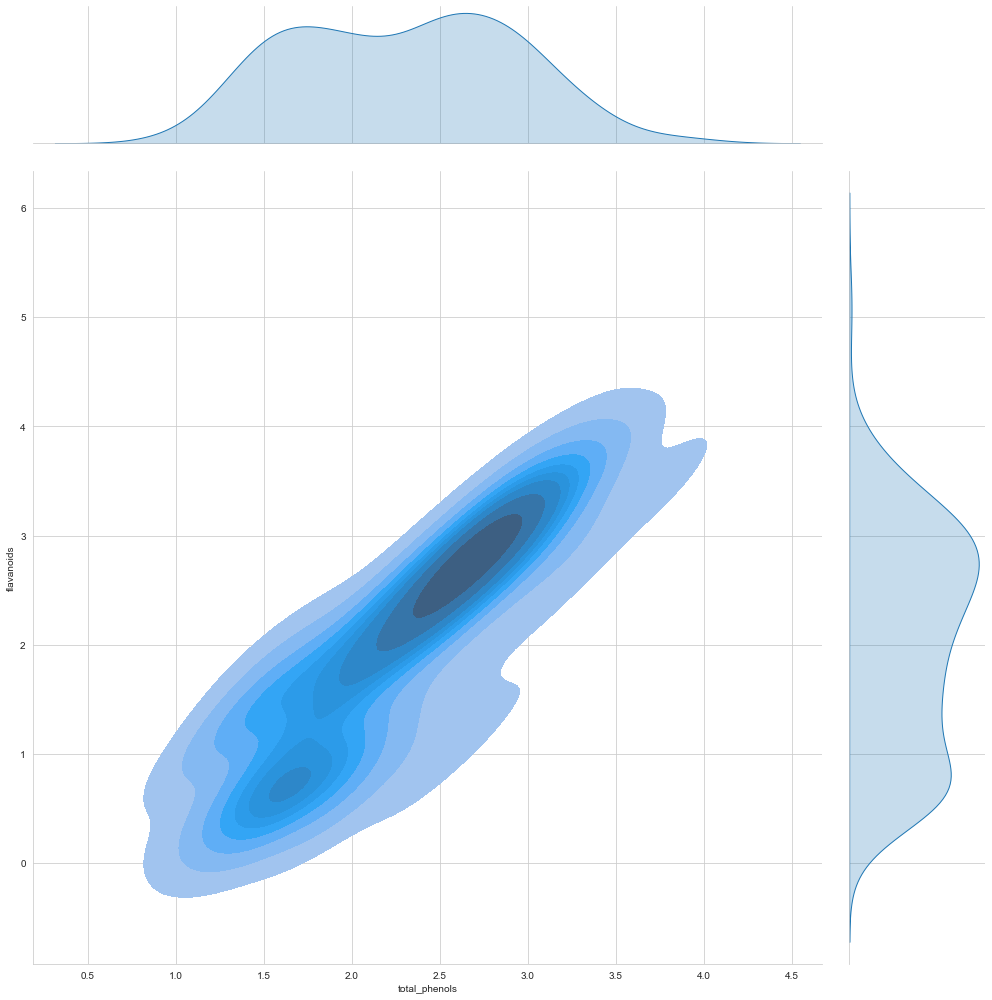

In [14]:
sns.jointplot(height= 14, data=df, x=df["total_phenols"],y=df["flavanoids"], kind="kde", fill=True)

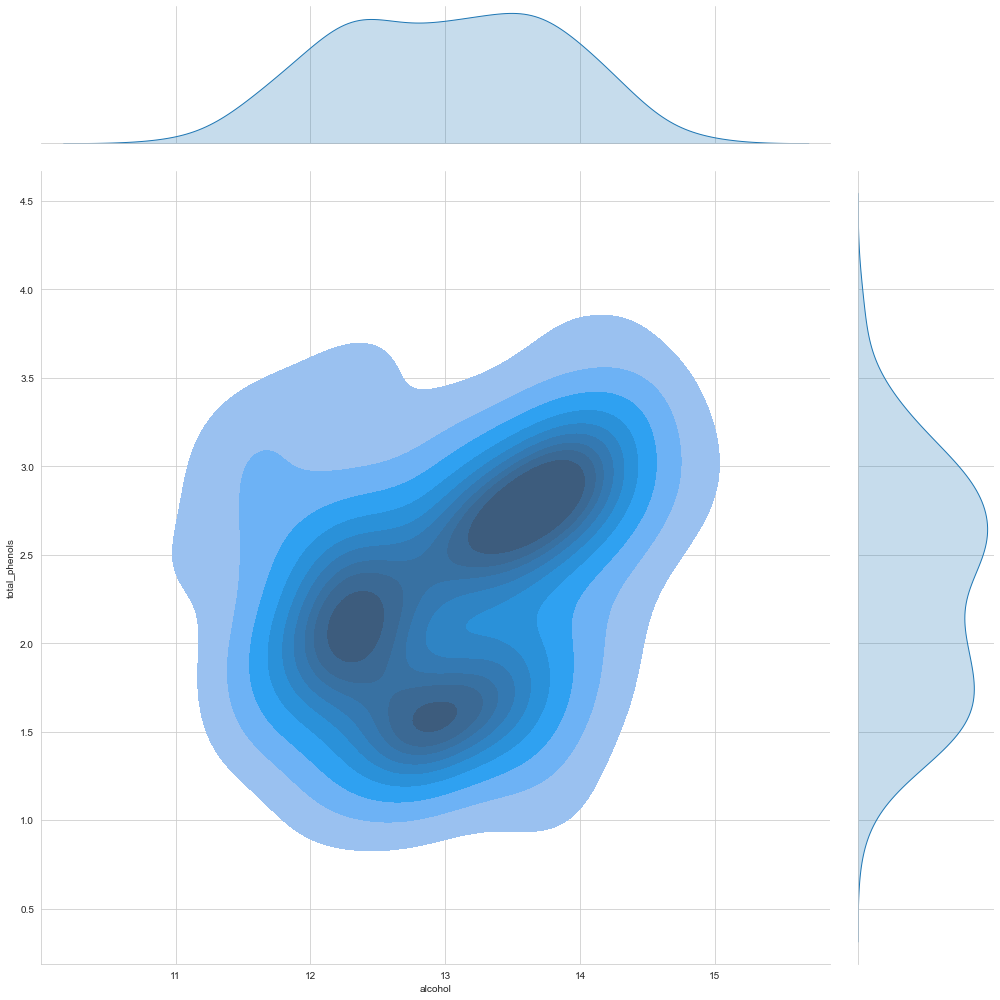

In [15]:
sns.jointplot(height= 14, data=df, x=df["alcohol"],y=df["total_phenols"], kind="kde", fill=True)

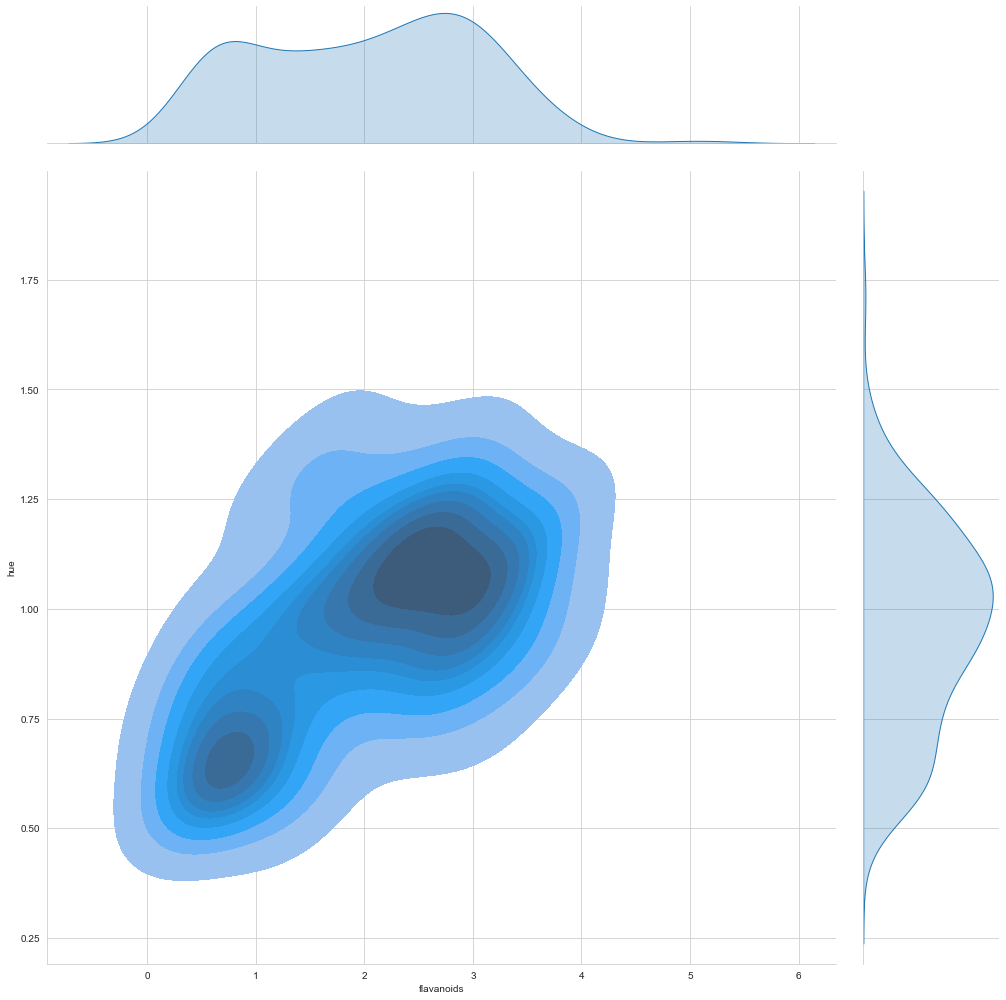

In [16]:
sns.jointplot(height= 14, data=df, x=df["flavanoids"],y=df["hue"], kind="kde", fill=True)

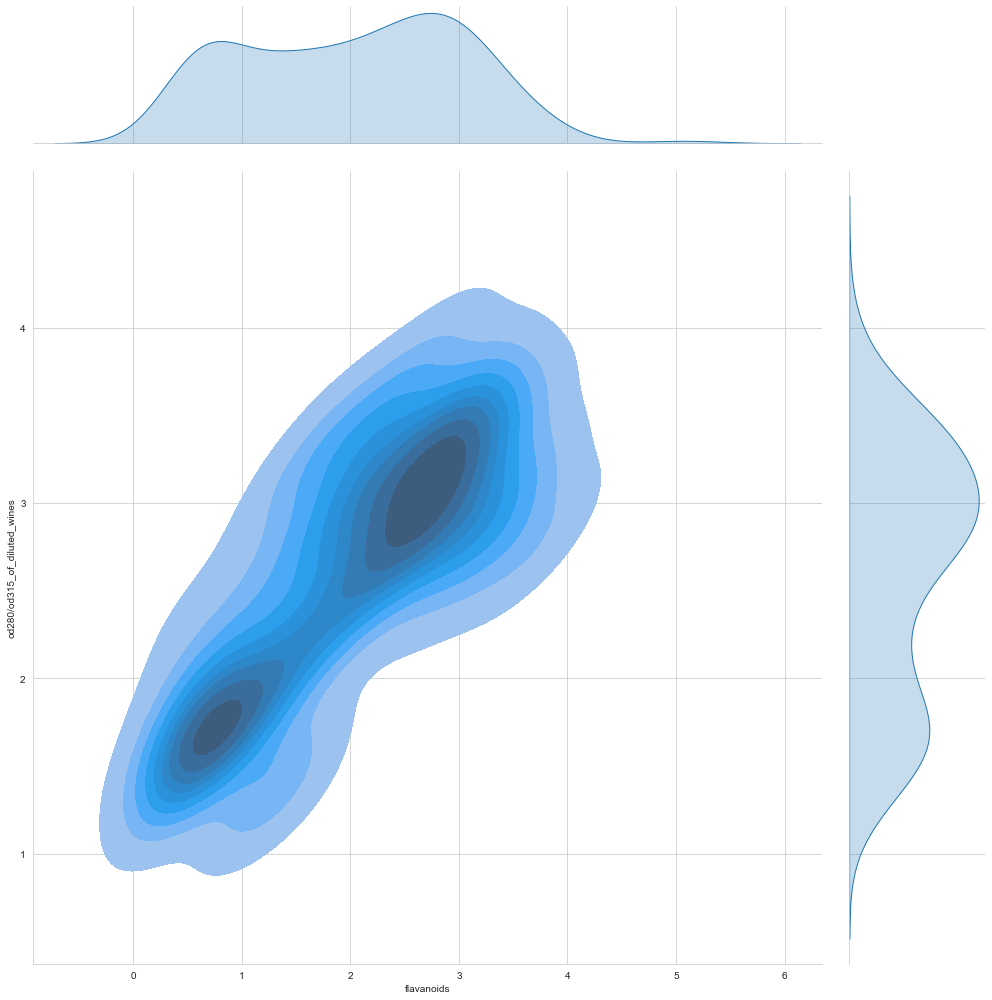

In [17]:
sns.jointplot(height= 14, data=df, x=df["flavanoids"],y=df["od280/od315_of_diluted_wines"], kind="kde", fill=True)

## Machine Learning

Establish model to classify wines.

In [18]:
from sklearn.model_selection import train_test_split
X = df[["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline"]]
y = df["type"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=101)

In [19]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0


In [20]:
X_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
37,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0
32,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0
148,13.32,3.24,2.38,21.5,92.0,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650.0
42,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0


In [21]:
y_train.head()

158    Class 3
13     Class 1
123    Class 2
25     Class 1
22     Class 1
Name: type, dtype: object

In [22]:
y_test.head()

37     Class 1
32     Class 1
148    Class 3
42     Class 1
153    Class 3
Name: type, dtype: object

## KNN Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
pred = knn.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
print(confusion_matrix(y_test,pred))

[[17  3  0]
 [ 0 18  7]
 [ 0  5  9]]


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Class 1       1.00      0.85      0.92        20
     Class 2       0.69      0.72      0.71        25
     Class 3       0.56      0.64      0.60        14

    accuracy                           0.75        59
   macro avg       0.75      0.74      0.74        59
weighted avg       0.77      0.75      0.75        59



In [29]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

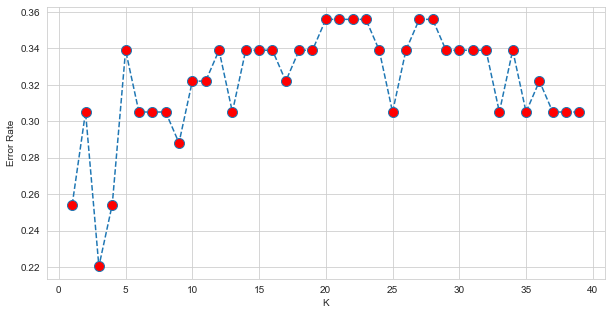

In [30]:
plt.figure(figsize = (10,5))
plt.plot(range(1,40),error_rate, linestyle="--", marker="o", markerfacecolor="red", markersize=10)
plt.xlabel("K")
plt.ylabel("Error Rate")

Test model with different n_neighbors

In [40]:
print(confusion_matrix(y_test,pred))

[[17  3  0]
 [ 0 18  7]
 [ 0  5  9]]


In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Class 1       1.00      0.85      0.92        20
     Class 2       0.69      0.72      0.71        25
     Class 3       0.56      0.64      0.60        14

    accuracy                           0.75        59
   macro avg       0.75      0.74      0.74        59
weighted avg       0.77      0.75      0.75        59



In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [49]:
print(confusion_matrix(y_test,pred))

[[17  1  2]
 [ 0 17  8]
 [ 1  1 12]]


In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Class 1       0.94      0.85      0.89        20
     Class 2       0.89      0.68      0.77        25
     Class 3       0.55      0.86      0.67        14

    accuracy                           0.78        59
   macro avg       0.79      0.80      0.78        59
weighted avg       0.83      0.78      0.79        59



## Test the model on irl data!

In [35]:
X_field = np.array([[ I N S E R T   D A T A ]])
prediction = knn.predict(X_field)
print(prediction)

SyntaxError: invalid syntax (1586917671.py, line 1)